In [3]:
#Desarrollado por:
    #Astrid Julieth Tovar
    #José Manuel Martínez

#Inteligencia Artificial
#Actividad 2 - Búsqueda y sistemas basados en reglas
#Fecha: 08/10/2023

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Ruta del CSV a trabajar
forbes = r"C:\Users\Rentadvisor\Documents\Python\Script\Inteligencia_Artificial\Archivos\Forbes 2000 2022.csv"

# Cargando el CSV en el DataFrame
df = pd.read_csv(forbes, encoding='latin-1', sep=';', header=0)
df.head()
# Mostrar información inicial
print(f"Tamaño Total: {len(df)} - Encabezados actuales: {df.columns}")

# Limpieza de datos
df.columns = ['Rango', 'Nombre_Compañia', 'Pais', 'Ventas', 'Beneficios', 'Activos', 'Valor_Mercado','Sin_Dato']
#df.dropna(subset=['Rango', 'Nombre_Compañia', 'Pais', 'Ventas', 'Beneficios', 'Activos', 'Valor_Mercado','Sin_Dato'], inplace=True)
df.drop_duplicates(inplace=True)

# Convertir texto a minúsculas en columnas de texto
df['Nombre_Compañia'] = df['Nombre_Compañia'].str.lower()
df['Pais'] = df['Pais'].str.lower()
df.drop(columns=['Sin_Dato'], inplace=True)

#Reemplazndo en columnas específicas
def format_value(value):
    return value.replace('$', '').strip()
df[['Ventas', 'Beneficios', 'Activos','Valor_Mercado']] = df[['Ventas', 'Beneficios', 'Activos','Valor_Mercado']].applymap(format_value)

# Mostrar los primeros 10 registros después de la limpieza
print(df.head(10))

# Conteo total de datos analizados y corregidos
total_registros = len(df)
total_columnas = len(df.columns)
print(f"Total de registros: {total_registros}")
print(f"Total de columnas: {total_columnas}")

#Guardar los cambios en el mismo archivo CSV
#df.to_csv(forbes, index=False, sep=';', encoding='latin-1')



Tamaño Total: 2000 - Encabezados actuales: Index(['ï»¿Rank', 'Company Name', 'Country', 'Sales\n($millions)',
       'Profits\n($millions)', 'Assets\n($millions)',
       'Market Value \nAs of 05/12/22 ($m)', 'Unnamed: 7'],
      dtype='object')
   Rango                           Nombre_Compañia           Pais   Ventas  \
0      1                        berkshire hathaway  united states  276,090   
1      2                                      icbc          china  208,130   
2      3  saudi arabian oil company (saudi aramco)   saudi arabia  400,380   
3      4                            jpmorgan chase  united states  124,540   
4      5                   china construction bank          china  202,070   
5      6                                    amazon  united states  469,820   
6      7                                     apple  united states  378,700   
7      8                agricultural bank of china          china  181,420   
8      9                           bank of america  

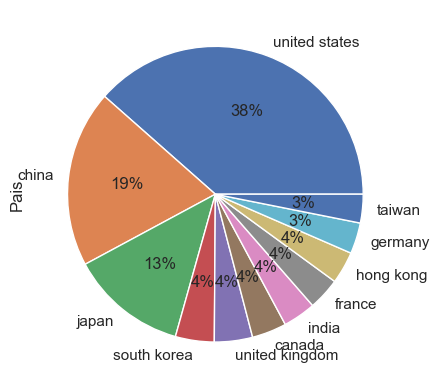

In [4]:
#Filtrar en la torta de pastel aquellos paises que representan mayor del 2% en la data
#Calcular las frecuencias de cada país
pais_counts = df['Pais'].value_counts()

# Calcular el porcentaje de cada país
pais_percent = pais_counts / pais_counts.sum() * 100

# Filtrar los países que representan más del 2%
pais_filtrado = pais_percent[pais_percent > 2]

# Graficar los países filtrados
pais_filtrado.plot(kind='pie', autopct='%1.0f%%')
plt.show()

In [6]:
#Mostrar encabezados del dataframe
df.head()

,Rango,Nombre_Compañia,Pais,Ventas,Beneficios,Activos,Valor_Mercado
0,1,berkshire hathaway,united states,"276,090","89,800","958,780","741,480"
1,2,icbc,china,"208,130","54,030","5,518,510","214,430"
2,3,saudi arabian oil company (saudi aramco),saudi arabia,"400,380","105,360","576,040","2,292,080"
3,4,jpmorgan chase,united states,"124,540","42,120","3,954,690","374,450"
4,5,china construction bank,china,"202,070","46,890","4,746,950","181,320"


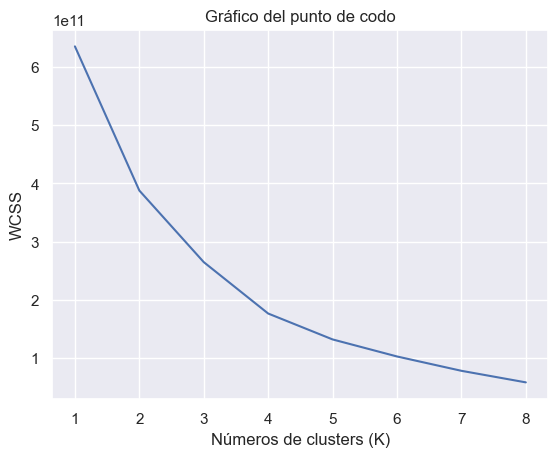

In [48]:
#Crear gráfico de la suma de las distancias al cuadrado dentro del cluster (WCSS)

plt.plot(range(1,9),WCSS)
plt.title('Gráfico del punto de codo')
plt.xlabel('Números de clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans_model = KMeans(n_clusters=4, init='k-means++',random_state=0)

In [21]:
y = kmeans_model.fit_predict(df['Ventas'].values.reshape(-1, 1))

C:\Users\Rentadvisor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
len(y)
print(y)

[2 1 2 ... 0 0 0]


In [23]:
pd.Series(y).value_counts()

0    1661
3     259
1      64
2      16
dtype: int64

In [24]:
kmeans_model.cluster_centers_

array([[ 11259.8915009 ],
       [142372.96875   ],
       [333175.625     ],
       [ 56050.68965517]])

In [45]:
#Agrupar los 10 paises con mayor número de commpañías
# Definir el número de países que se quiere mantener
n = 10

# Encontrar los n países con más compañías
paises_principales = df['Pais'].value_counts().index[:n]

# Crear una nueva columna que contenga los países principales y agrupe todos los demás en 'Otros'
df['Pais_agrupado'] = df['Pais'].where(df['Pais'].isin(paises_principales), 'Otros')
print(df.head())

   Rango                           Nombre_Compañia           Pais    Ventas  \
0      1                        berkshire hathaway  united states  276090.0   
1      2                                      icbc          china  208130.0   
2      3  saudi arabian oil company (saudi aramco)   saudi arabia  400380.0   
3      4                            jpmorgan chase  united states  124540.0   
4      5                   china construction bank          china  202070.0   

   Beneficios    Activos Valor_Mercado  Pais_agrupado  
0     89800.0   958780.0       741,480  united states  
1     54030.0  5518510.0       214,430          china  
2    105360.0   576040.0     2,292,080          Otros  
3     42120.0  3954690.0       374,450  united states  
4     46890.0  4746950.0       181,320          china  


C:\Users\Rentadvisor\AppData\Local\Temp\ipykernel_23608\1433674167.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Pais_agrupado', y='Ventas', data=df, palette = "viridis")


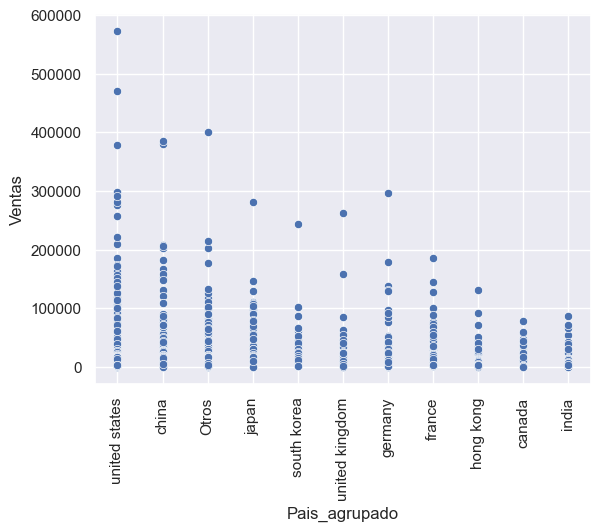

In [47]:
#Craer un gráfico de dispersión, doonde el eje x representa n paises agrupados por mayor número de compañías y el eje y representa las ventas
sns.scatterplot(x='Pais_agrupado', y='Ventas', data=df, palette = "viridis")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.show()

In [25]:
df.columns

Index(['Rango', 'Nombre_Compañia', 'Pais', 'Ventas', 'Beneficios', 'Activos',
       'Valor_Mercado'],
      dtype='object')

C:\Users\Rentadvisor\AppData\Local\Programs\Python\Python311\Lib\site-packages\mpl_toolkits\mplot3d\art3d.py:1110: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Users\Rentadvisor\AppData\Local\Programs\Python\Python311\Lib\site-packages\mpl_toolkits\mplot3d\art3d.py:1112: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


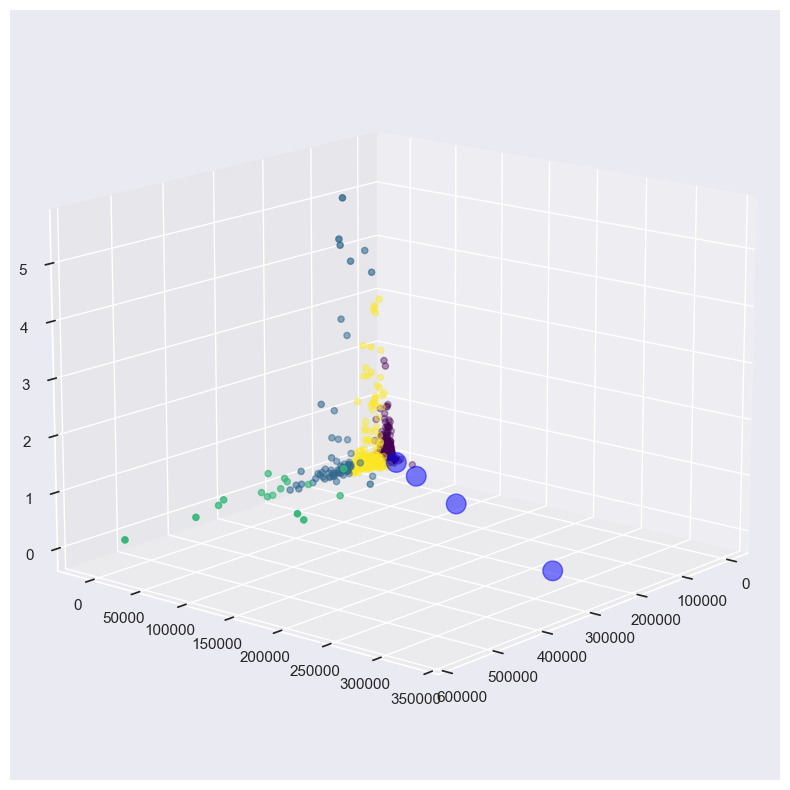

In [39]:
#Rango', 'Nombre_Compañia', 'Pais', 'Ventas', 'Beneficios', 'Activos', 'Valor_Mercado

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


ax.view_init(15, 40)

ax.scatter(df['Ventas'], df['Beneficios'],df['Activos'],c= y,cmap='viridis')
ax.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,0],c ='blue',s=200,alpha = 0.5)

plt.show()